In [177]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [178]:
def oversampler_choice_train(x):
    global X_train, y_train
    if x=="ros":
        ros = RandomOverSampler()
        X_train, y_train = ros.fit_sample(X_train, y_train)
        print("Random Oversampler:\n", y_train.value_counts())
    elif x=="smote":
        smote = SMOTE()
        X_train, y_train = smote.fit_sample(X_train, y_train)
        print("SMOTE:\n", y_train.value_counts())
    elif x == "ada":
        ada = ADASYN(random_state=42)
        X_train, y_train = ada.fit_sample(X_train, y_train)
        print("ADASYN:\n", y_train.value_counts())
    else:
        print ("Input should be ros, smote or ada")

In [179]:
#function to run chosen model

def model_predictions(x, X_train, X_test, y_train, y_test):
    #global X_train, X_test, y_train, y_test, model, predictions
    if x == "logistic":
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
        model.fit(X_train, y_train)
        print("Logistic:")
        predictions =  model.predict(X_test)
    elif x == "knn":
        model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
    elif x=="decision_tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        print("Decision Tree:")
        predictions = model.predict(X_test)
    elif x=="random_forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print ("Random Forest:")
        predictions = model.predict(X_test)
    else:
        print ("Input should be logistic, knn, decision_tree or random_forest")   
    
    #calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
    print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
    print("Kappa: ", cohen_kappa_score(y_test, predictions))   
    print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
    print("F1 score: ", f1_score(y_test, predictions))  
    #generate confusion matrices with raw and normalised values
    print ("Confusion Matrix - raw:")
    plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
    plt.show() 
    print ("Confusion Matrix - normalised row-wise:")
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
    plt.show() 
    return [model, predictions]

*Import preprocessed data*

In [201]:
data = pd.read_csv('data_preprocessed.csv')

In [197]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.351865,1.123351,0.679100,No
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.055860,0.970940,0.977003,No
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.265912,1.912202,0.936090,No
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.224926,1.421473,0.443847,No
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.364842,-0.174653,-0.117438,No


*Assign final column as y and remaining columns as X features*


In [206]:
y = pd.DataFrame(data[data.columns[-1]])
X = data.drop([data.columns[-1]],axis=1)

*Map y to 1 and 0 for model*

In [207]:
mapping = {
        'Yes': 1,
        'No': 0,
    }
y = y[data.columns[-1]].replace(mapping)

In [208]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 15, dtype: int64

In [209]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


*Split into train/test data*

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [211]:
print("y_test:\n",y_test.value_counts())
print("y_train:\n", y_train.value_counts())

y_test:
 0    4253
1     235
Name: 15, dtype: int64
y_train:
 0    9857
1     615
Name: 15, dtype: int64


*Choose which oversampler to use to help deal with the imbalance. Undersamplers were ruled out due to the small dataset*

In [212]:
#choose smote, ada (ADASYN) or ros (Random Oversampler)
oversampler_choice_train("smote")

SMOTE:
 1    9857
0    9857
Name: 15, dtype: int64


*Choose which model to run and generate confusion matrices and scores*

Logistic:
The accuracy of the model on test set is:  0.6911764705882353
Kappa:  0.11408563237298475
ROC-AUC score:  0.7003697014873106
F1 score:  0.19418604651162788
Confusion Matrix - raw:


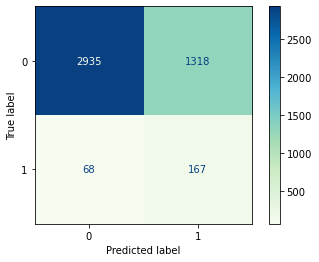

Confusion Matrix - normalised row-wise:


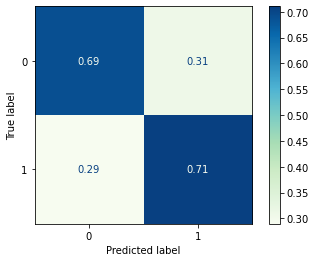

In [214]:
#Logistic Regression: "logistic", K Nearest Neighbours: "knn", Decision Tree: "decision_tree", Random Forest: "random_forest"
model_run = model_predictions("logistic", X_train, X_test, y_train, y_test)

*ROC Curve*

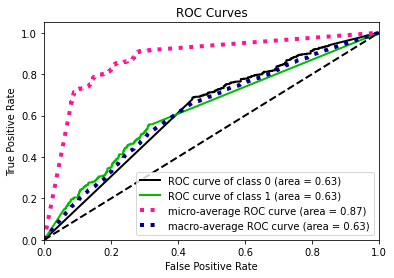

In [190]:
import scikitplot as skplt
model = model_run[0]
y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true,y_probas)
plt.show()

*Logistic Regression Precision-Recall Curve and F1 score*

Logistic: f1=0.196 auc=0.148


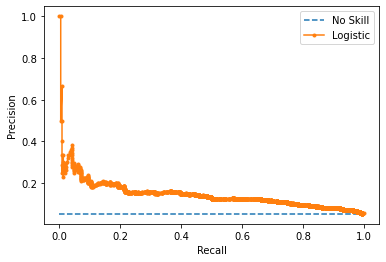

In [191]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# fit a model
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

*Random forest for feature importance on a classification problem*


Feature: 0, Score: 0.07115
Feature: 1, Score: 0.05144
Feature: 2, Score: 0.14162
Feature: 3, Score: 0.04479
Feature: 4, Score: 0.04496
Feature: 5, Score: 0.13112
Feature: 6, Score: 0.05424
Feature: 7, Score: 0.01681
Feature: 8, Score: 0.02546
Feature: 9, Score: 0.02154
Feature: 10, Score: 0.02088
Feature: 11, Score: 0.00835
Feature: 12, Score: 0.11964
Feature: 13, Score: 0.12419
Feature: 14, Score: 0.12381


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

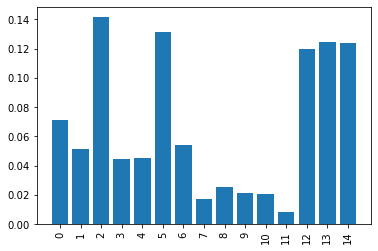

In [192]:
from sklearn.datasets import make_classification
from matplotlib import pyplot

model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in X_train], importance)
plt.xticks(rotation='vertical')

The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

Feature: 0, Score: -0.82688
Feature: 1, Score: -0.29659
Feature: 2, Score: 0.95342
Feature: 3, Score: 0.98409
Feature: 4, Score: 0.41878
Feature: 5, Score: 1.85942
Feature: 6, Score: 0.89001
Feature: 7, Score: -0.37244
Feature: 8, Score: -0.24783
Feature: 9, Score: -0.32829
Feature: 10, Score: -0.49136
Feature: 11, Score: -0.55550


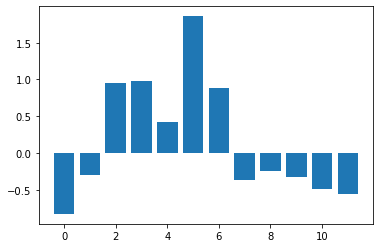

In [215]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()